Identifying missing values in each class and removing them, also converting text to string and using regex to remove unnecessary elements.

In [ ]:
import pandas as pd
import re

# Load the dataframe
df = pd.read_csv('/content/train.csv')

# Check for missing values in 'sub_category'
missing_sub_category = df['sub_category'].isnull().sum()
missing_category = df['category'].isnull().sum()
print(f"Missing values in sub_category: {missing_sub_category}")
print(f"Missing values in category: {missing_category}")

# Drop rows with missing values in 'sub_category' and 'category'
df = df.dropna(subset=['sub_category'])
df = df.dropna(subset=['category'])

# Function to standardize text
def standardize_text(text):
    # Convert to string if not already
    if not isinstance(text, str):
        text = str(text)

    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply the function to the 'crimeaditionalinfo' column
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(standardize_text)

Missing values in sub_category: 6591
Missing values in category: 0


Using NLTK library to remove stop words and process lemmatization on text.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Load SpaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatized_text = [token.lemma_ for token in nlp(" ".join(words))]

    # Join lemmatized words back into a single string
    return " ".join(lemmatized_text)

# Apply preprocessing function to 'crimeaditionalinfo' column
df['processed_text'] = df['crimeaditionalinfo'].apply(preprocess_text)

# Display the processed data
df[['crimeaditionalinfo', 'processed_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,crimeaditionalinfo,processed_text
0,I had continue received random calls and abusi...,continue receive random call abusive message w...
1,The above fraudster is continuously messaging ...,fraudster continuously message ask pay money s...
2,He is acting like a police and demanding for m...,act like police demand money add section text ...
3,In apna Job I have applied for job interview f...,apna job apply job interview telecalle resourc...
4,I received a call from lady stating that she w...,receive call lady state send new phone vivo re...


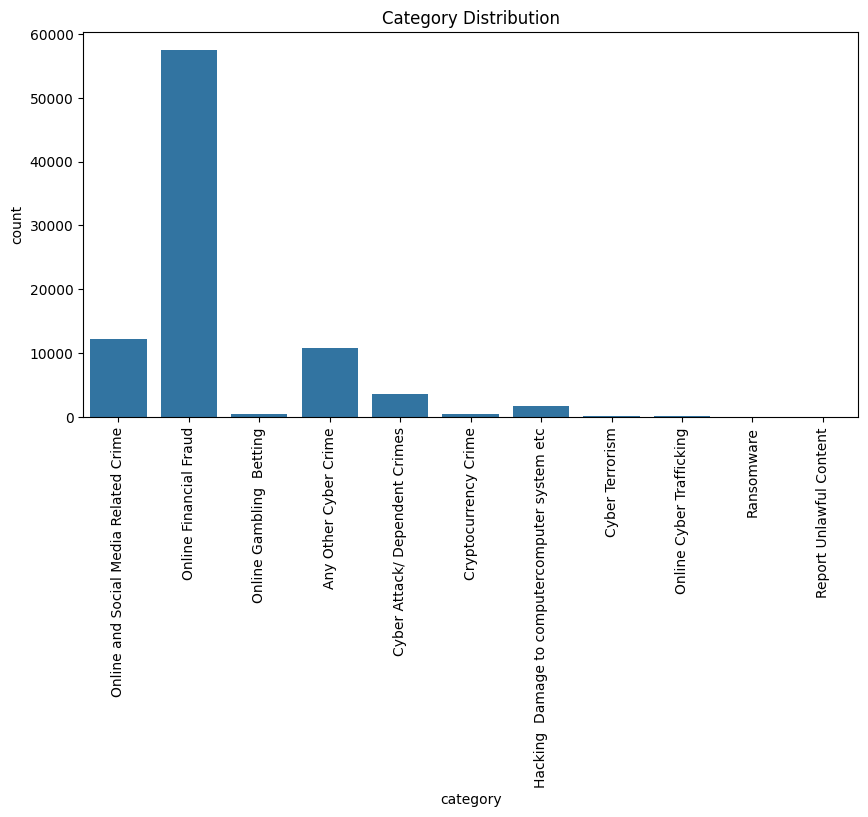

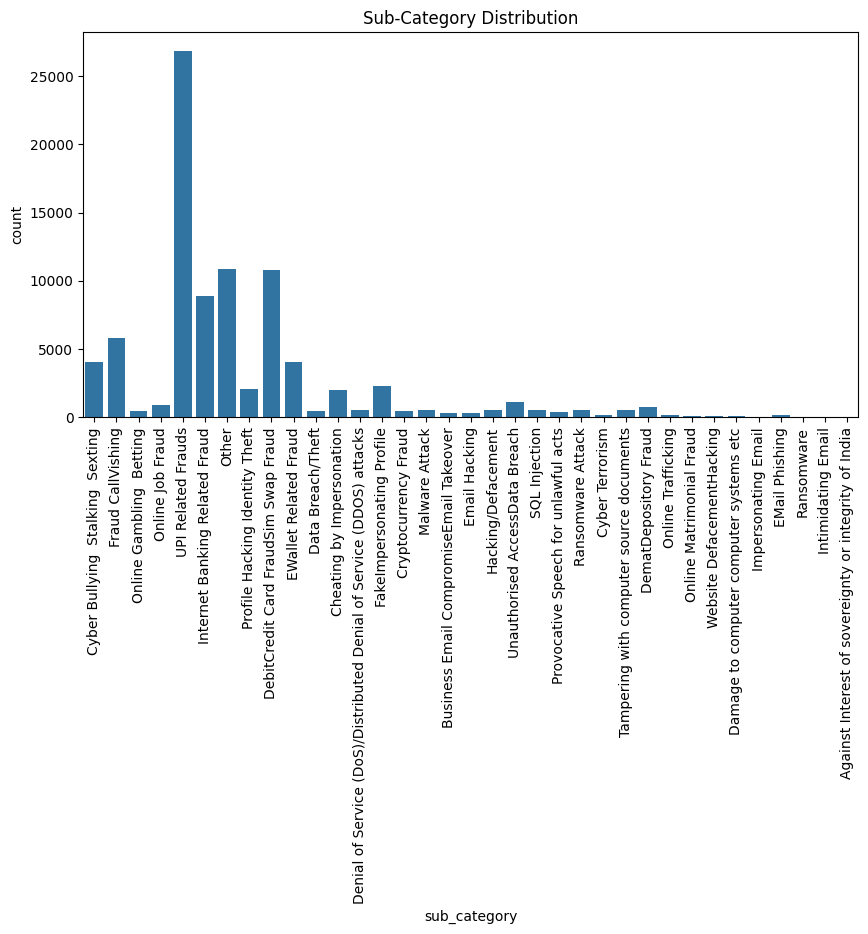

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 5))
sns.countplot(x='category', data=df)
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.show()

# Sub-Category Distribution
sub_category_counts = df['sub_category'].value_counts()
plt.figure(figsize=(10, 5))
sns.countplot(x='sub_category', data=df)
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)
plt.show()

Distribution of text lengths in various categories and sub categories

count    87095.000000
mean        39.982399
std         32.361884
min          0.000000
25%         21.000000
50%         30.000000
75%         53.000000
max        309.000000
Name: text_length, dtype: float64


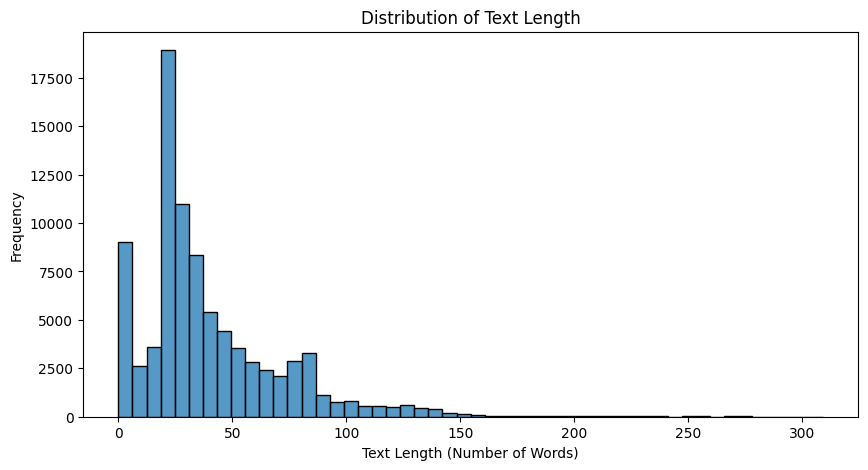

In [ ]:
df['text_length'] = df['processed_text'].astype(str).apply(lambda x: len(x.split()))

# Descriptive statistics of text length
text_length_stats = df['text_length'].describe()
print(text_length_stats)

# Histogram of text length
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

Showing most common keywords from each category using wordcloud


Top keywords for category: Online and Social Media Related Crime
{'account': 7007, 'ask': 4853, 'contact': 2891, 'facebook': 4776, 'fake': 2706, 'friend': 3525, 'hai': 3313, 'help': 4087, 'message': 3396, 'money': 5760, 'number': 7771, 'pay': 4343, 'person': 3765, 'request': 2652, 'say': 3275, 'send': 5743, 'sir': 3812, 'use': 2985, 'video': 7424, 'whatsapp': 4014}


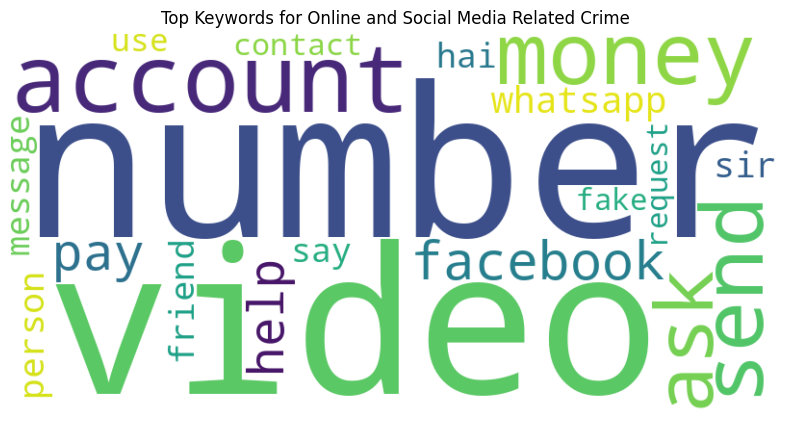


Top keywords for category: Online Financial Fraud
{'account': 44414, 'action': 12522, 'ask': 15532, 'bank': 40178, 'card': 21159, 'complaint': 12307, 'debit': 10755, 'fraud': 38290, 'money': 22296, 'number': 27778, 'pay': 22951, 'phone': 15426, 'receive': 10845, 'rs': 21233, 'say': 13696, 'send': 13900, 'time': 10987, 'total': 25198, 'transaction': 15026, 'upi': 11167}


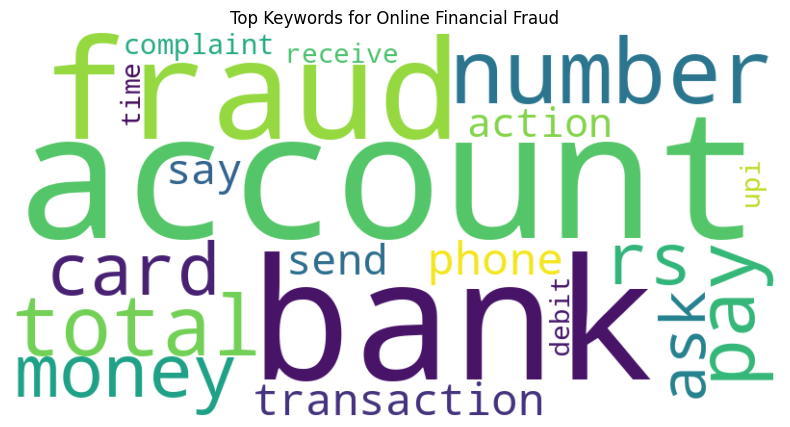


Top keywords for category: Online Gambling  Betting
{'account': 178, 'app': 174, 'ask': 161, 'contact': 111, 'fraud': 92, 'hai': 104, 'help': 138, 'loan': 97, 'money': 474, 'number': 198, 'online': 89, 'pay': 181, 'people': 108, 'phone': 89, 'rs': 123, 'say': 161, 'send': 163, 'sir': 189, 'tell': 126, 'whatsapp': 104}


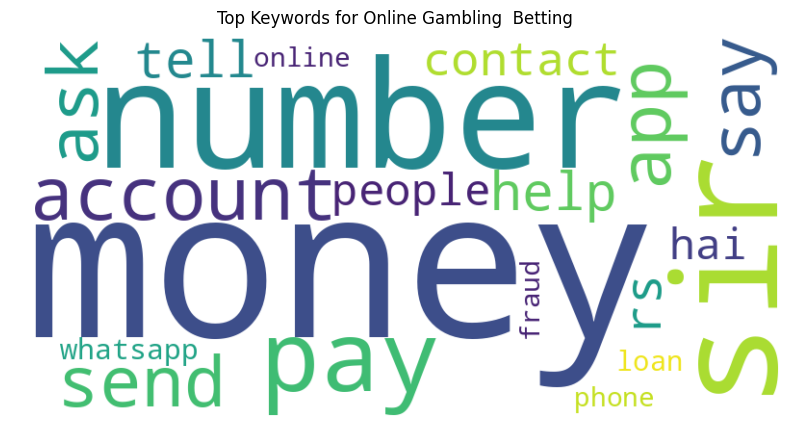


Top keywords for category: Any Other Cyber Crime
{'account': 5054, 'app': 3252, 'ask': 3691, 'bank': 3261, 'card': 2863, 'contact': 3693, 'hai': 2877, 'help': 2972, 'loan': 5366, 'money': 5291, 'number': 7044, 'pay': 5881, 'payment': 2752, 'person': 2910, 'phone': 3041, 'receive': 2912, 'rs': 4496, 'say': 3507, 'send': 3546, 'sir': 3042}


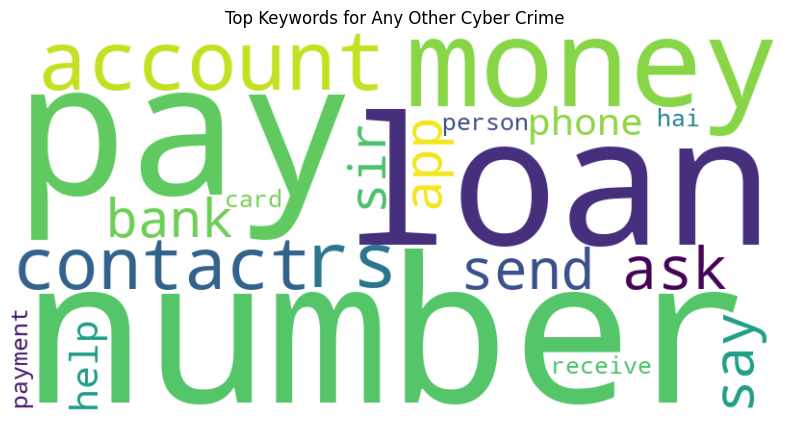


Top keywords for category: Cyber Attack/ Dependent Crimes
{'account': 5409, 'anymore': 4492, 'apart': 3608, 'come': 3503, 'email': 5416, 'fall': 3608, 'feel': 3620, 'fix': 4514, 'know': 5395, 'like': 7260, 'lock': 3608, 'phone': 2972, 'problem': 3608, 'right': 3608, 'stange': 4070, 'start': 4342, 'thing': 3592, 'think': 3642, 'try': 4522, 'work': 4515}


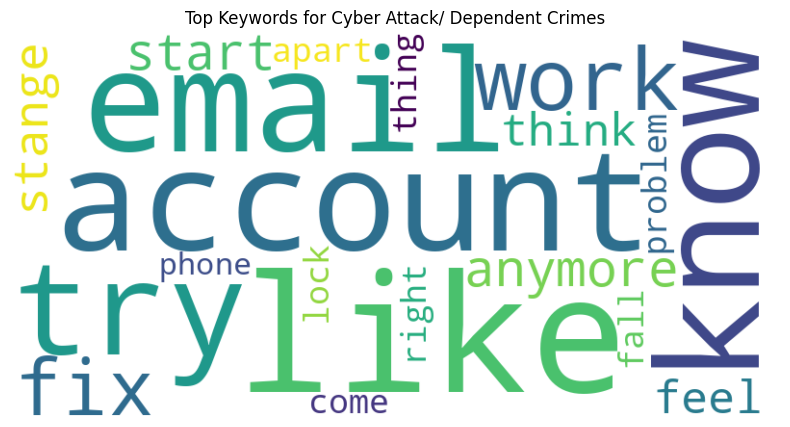


Top keywords for category: Cryptocurrency Crime
{'account': 278, 'app': 384, 'ask': 229, 'company': 170, 'crypto': 176, 'day': 168, 'group': 244, 'help': 178, 'invest': 361, 'money': 442, 'pay': 248, 'people': 144, 'profit': 170, 'return': 135, 'rs': 141, 'say': 172, 'tell': 152, 'transfer': 137, 'usdt': 171, 'withdraw': 144}


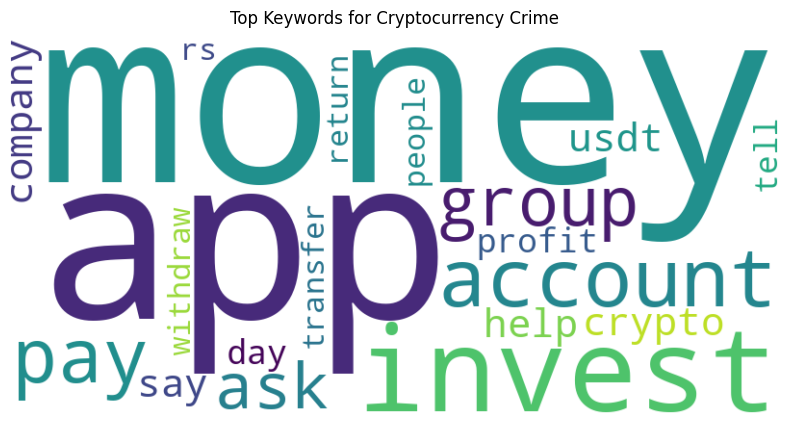


Top keywords for category: Hacking  Damage to computercomputer system etc
{'account': 1183, 'app': 951, 'card': 487, 'contact': 1197, 'email': 635, 'hack': 1113, 'hai': 949, 'help': 858, 'kar': 523, 'list': 527, 'loan': 1719, 'mere': 609, 'mobile': 529, 'number': 865, 'pay': 465, 'phone': 599, 'se': 465, 'send': 534, 'sir': 809, 'use': 497}


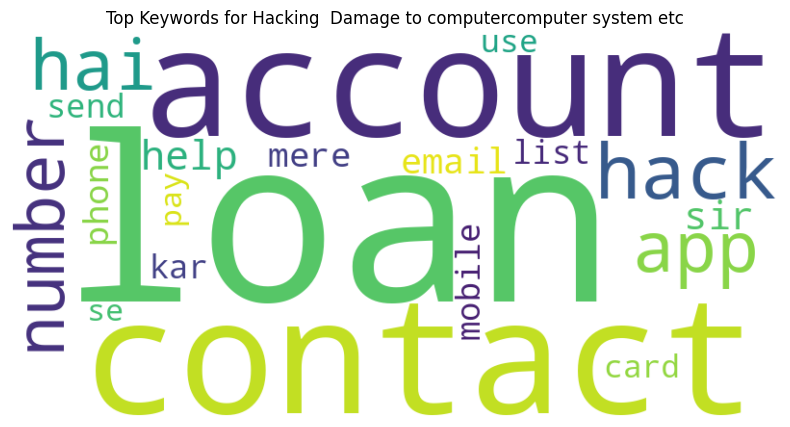


Top keywords for category: Cyber Terrorism
{'abuse': 37, 'account': 55, 'action': 36, 'app': 87, 'card': 47, 'contact': 81, 'hai': 43, 'help': 49, 'ki': 35, 'loan': 98, 'message': 53, 'money': 61, 'number': 112, 'pay': 48, 'phone': 56, 'say': 37, 'send': 66, 'sir': 50, 'use': 45, 'whatsapp': 49}


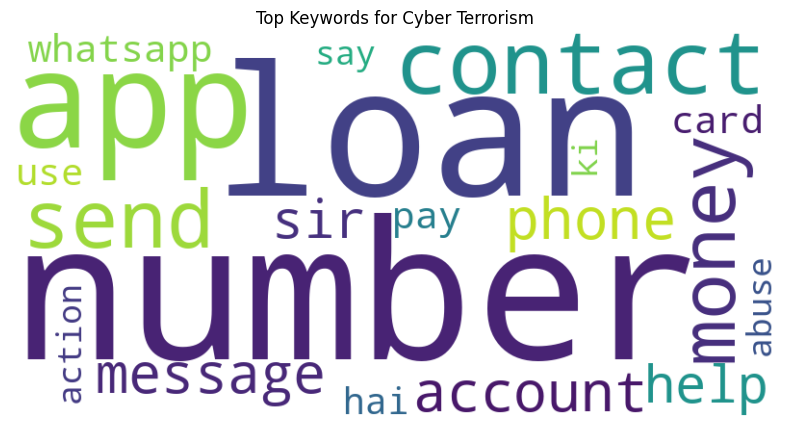


Top keywords for category: Online Cyber Trafficking
{'account': 72, 'app': 49, 'ask': 71, 'card': 45, 'contact': 49, 'hai': 45, 'help': 59, 'loan': 43, 'message': 40, 'money': 83, 'number': 107, 'pay': 68, 'phone': 51, 'rs': 44, 'say': 66, 'send': 75, 'sir': 63, 'tell': 44, 'video': 75, 'whatsapp': 40}


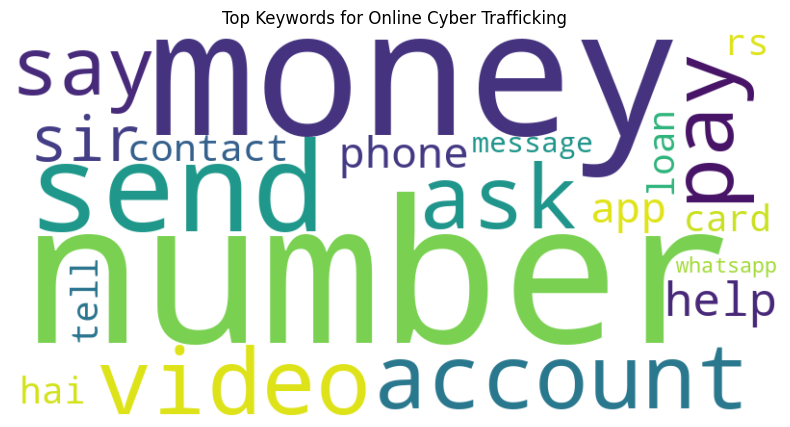


Top keywords for category: Ransomware
{'ask': 21, 'contact': 13, 'datum': 23, 'decrypt': 14, 'email': 20, 'encrypt': 17, 'file': 66, 'help': 15, 'laptop': 12, 'mail': 12, 'message': 16, 'money': 14, 'password': 13, 'pay': 17, 'ransomware': 17, 'receive': 14, 'rs': 13, 'send': 14, 'use': 13, 'video': 14}


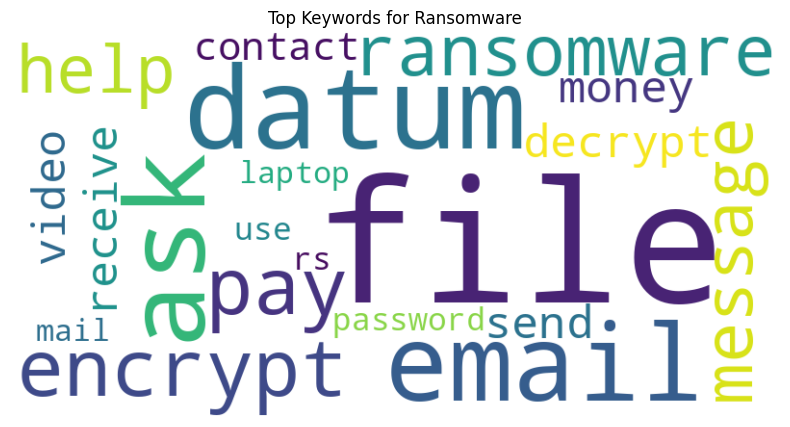


Top keywords for category: Report Unlawful Content
{'abuse': 1, 'accordingly': 1, 'mir': 1, 'movement': 1, 'mushtaq': 1, 'nadu': 1, 'narendra': 1, 'people': 4, 'platform': 1, 'pm': 1, 'punjab': 1, 'recently': 1, 'request': 1, 'separatist': 2, 'sharing': 2, 'social': 1, 'stage': 2, 'support': 2, 'swathi': 1, 'video': 2}


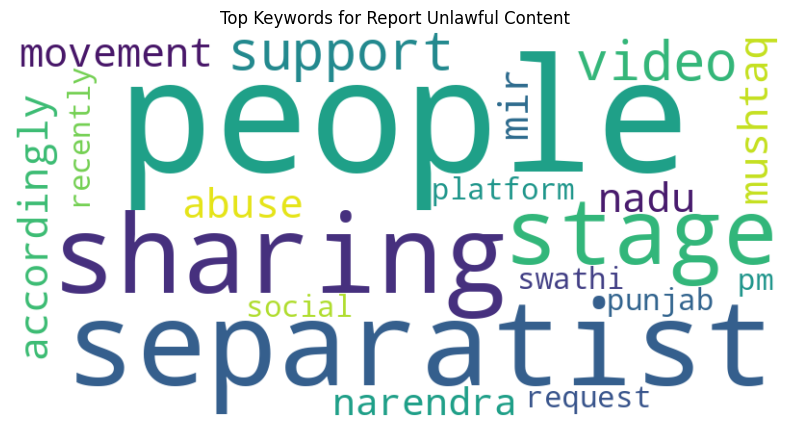

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Drop rows with missing descriptions
df = df.dropna(subset=['processed_text'])

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply preprocessing
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Analyze keywords by category
categories = df['category'].unique()
keyword_analysis = {}

# Loop through each category
for category in categories:
    # Filter data by category
    category_data = df[df['category'] == category]
    # Use CountVectorizer to get word counts
    vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 keywords
    word_counts = vectorizer.fit_transform(category_data['processed_text'])
    keyword_counts = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).A1))
    keyword_analysis[category] = keyword_counts

# Display results
for category, keywords in keyword_analysis.items():
    print(f"\nTop keywords for category: {category}")
    print(keywords)

    # Generate word cloud for each category
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keywords)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Keywords for {category}")
    plt.show()

Final Keyword Analysis from each category, removing unnecessary words manually.

In [ ]:
keyword_analysis = {
    'Ransomware': {'ask': 21, 'contact': 13, 'datum': 23, 'decrypt': 14, 'email': 20, 'encrypt': 17, 'file': 66, 'help': 15, 'laptop': 12, 'mail': 12, 'message': 16, 'money': 14, 'password': 13, 'pay': 17, 'ransomware': 17, 'receive': 14, 'rs': 13, 'send': 14, 'use': 13, 'video': 14},
    'Report Unlawful Content': {'abuse': 1, 'accordingly': 1, 'mir': 1, 'movement': 1, 'mushtaq': 1, 'nadu': 1, 'narendra': 1, 'people': 4, 'platform': 1, 'pm': 1, 'punjab': 1, 'recently': 1, 'request': 1, 'separatist': 2, 'sharing': 2, 'social': 1, 'stage': 2, 'support': 2, 'swathi': 1, 'video': 2},
    'Online Cyber Trafficking': {'account': 72, 'app': 49, 'ask': 71, 'card': 45, 'contact': 49, 'help': 59, 'loan': 43, 'message': 40, 'money': 83, 'number': 107, 'pay': 68, 'phone': 51, 'rs': 44, 'say': 66, 'send': 75, 'sir': 63, 'tell': 44, 'video': 75, 'whatsapp': 40},
    'Cyber Terrorism': {'abuse': 37, 'account': 55, 'action': 36, 'app': 87, 'card': 47, 'contact': 81, 'help': 49, 'loan': 98, 'message': 53, 'money': 61, 'number': 112, 'pay': 48, 'phone': 56, 'send': 66, 'use': 45, 'whatsapp': 49},
    'Hacking  Damage to computercomputer system etc': {'account': 1183, 'app': 951, 'card': 487, 'contact': 1197, 'email': 635, 'hack': 1113, 'help': 858, 'list': 527, 'loan': 1719, 'mobile': 529, 'number': 865, 'pay': 465, 'phone': 599, 'send': 534, 'sir': 809, 'use': 497},
    'Cryptocurrency Crime': {'account': 278, 'app': 384, 'company': 170, 'crypto': 176, 'day': 168, 'group': 244, 'help': 178, 'invest': 361, 'money': 442, 'pay': 248, 'people': 144, 'profit': 170, 'return': 135, 'rs': 141, 'transfer': 137, 'usdt': 171, 'withdraw': 144},
    'Cyber Attack/ Dependent Crimes': {'account': 5409, 'email': 5416, 'fall': 3608, 'feel': 3620, 'fix': 4514, 'lock': 3608, 'phone': 2972, 'problem': 3608, 'right': 3608, 'stange': 4070, 'start': 4342, 'thing': 3592, 'think': 3642, 'try': 4522, 'work': 4515},
    'Any Other Cyber Crime': {'account': 5054, 'app': 3252, 'bank': 3261, 'card': 2863, 'contact': 3693, 'help': 2972, 'loan': 5366, 'money': 5291, 'number': 7044, 'pay': 5881, 'payment': 2752, 'person': 2910, 'phone': 3041, 'receive': 2912, 'rs': 4496, 'send': 3546, 'sir': 3042},
    'Online Gambling  Betting': {'account': 178, 'app': 174, 'contact': 111, 'fraud': 92, 'help': 138, 'loan': 97, 'money': 474, 'number': 198, 'online': 89, 'pay': 181, 'people': 108, 'phone': 89, 'rs': 123, 'send': 163, 'sir': 189, 'whatsapp': 104},
    'Online Financial Fraud': {'account': 44414, 'action': 12522, 'bank': 40178, 'card': 21159, 'complaint': 12307, 'debit': 10755, 'fraud': 38290, 'money': 22296, 'number': 27778, 'pay': 22951, 'phone': 15426, 'receive': 10845, 'rs': 21233, 'send': 13900, 'time': 10987, 'total': 25198, 'transaction': 15026, 'upi': 11167},
    'Online and Social Media Related Crime': {'account': 7007, 'contact': 2891, 'facebook': 4776, 'fake': 2706, 'friend': 3525, 'message': 3396, 'money': 5760, 'number': 7771, 'pay': 4343, 'request': 2652, 'send': 5743, 'sir': 3812, 'video': 7424, 'whatsapp': 4014}
    }

In [ ]:
df.to_csv('updated_data_train.csv', index=False)